In [1]:
%run ../chap09/cnn_ext_model.ipynb
#%run ../chap09/dataset_dummy.ipynb

#imagenet = DummyDataset('imagenet', 'select', [224,224,3], 1000)

In [2]:
CnnExtModel.set_macro('pn',
    ['serial',
        ['conv', {'ksize':3, 'stride':2, 'chn':'#n', 'actions':'#act'}],
        ['loop', {'repeat':'#cnt1'},
                 ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]]])

CnnExtModel.set_macro('plain_34',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['loop', {'repeat':6}, ['conv', {'ksize':3, 'chn':64, 'actions':'#act'}]],
        ['custom', {'name':'pn', 'args':{'#cnt1':7, '#n':128, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':11, '#n':256, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':5, '#n':512, '#act':'#act'}}],
        ['avg', {'stride':7}]])

#plain_34 = CnnExtModel('plain_34', imagenet,
#       ['custom', {'name':'plain_34', 'args':{'#act':'LA'}}], dump_structure=True)

In [3]:
CnnExtModel.set_macro('rf',
    ['add', {'x':True},
        ['serial', ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}],
                   ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]]])

CnnExtModel.set_macro('rh',
    ['add', {'x':False},
        ['serial', ['conv', {'ksize':3, 'stride':2, 'chn':'#n', 'actions':'#act'}],
                   ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]],
        ['avg', {'stride':2}]])

CnnExtModel.set_macro('rfull',
    ['serial',
        ['loop', {'repeat':'#cnt'},
                 ['custom', {'name':'rf', 'args':{'#n':'#n', '#act':'#act'}}]]])

CnnExtModel.set_macro('rhalf',
    ['serial',
        ['custom', {'name':'rh', 'args':{'#n':'#n', '#act':'#act'}}],
        ['loop', {'repeat':'#cnt1'},
                 ['custom', {'name':'rf', 'args':{'#n':'#n', '#act':'#act'}}]]])

CnnExtModel.set_macro('residual_34',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['custom', {'name':'rfull', 'args':{'#cnt':3, '#n':64, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':3, '#n':128, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':5, '#n':256, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':2, '#n':512, '#act':'#act'}}],
        ['avg', {'stride':7}]])

#residual_34 = CnnExtModel('residual_34', imagenet,
#    ['custom', {'name':'residual_34', 'args':{'#act':'LA'}}], dump_structure=True)

In [4]:
CnnExtModel.set_macro('bf',
    ['add', {'x':True},
        ['serial',
            ['conv', {'ksize':1, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':1, 'chn':'#n4', 'actions':'#act'}]]])

CnnExtModel.set_macro('bh',
    ['add', {'x':False},
        ['serial',
            ['conv', {'ksize':1, 'stride':2, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':1, 'chn':'#n4', 'actions':'#act'}]],
        ['avg', {'stride':2}]])

CnnExtModel.set_macro('bfull',
    ['serial',
        ['loop', {'repeat':'#cnt'},
            ['custom', {'name':'bf', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}]]])

CnnExtModel.set_macro('bhalf',
    ['serial',
        ['custom', {'name':'bh', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}],
        ['loop', {'repeat':'#cnt1'},
            ['custom', {'name':'bf', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}]]])

CnnExtModel.set_macro('bottleneck_152',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull','args':{'#cnt':3,'#n1':64,'#n4':256,'#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':7,'#n1':128,'#n4':512,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':35,'#n1':256,'#n4':1024,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':2,'#n1':512,'#n4':2048,
            '#act':'#act'}}],
        ['avg', {'stride':7}]])

#bottleneck_152 = CnnExtModel('bottleneck_152', imagenet,
#        ['custom', {'name':'bottleneck_152', 'args':{'#act':'LAB'}}],
#                    dump_structure=True)

In [5]:
%run ../chap05/dataset_health.ipynb

hd = HealthDataset([64,64], [64,64,3])

custom plain_health
  serial
    1: conv, (64, 64, 3)=>[32, 32, 16] pm:7x7x3x16+16=2368
    2: max, [32, 32, 16]=>[16, 16, 16]
    loop
      3: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
      4: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
      5: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
      6: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
    custom pn
      serial
        7: conv, [16, 16, 16]=>[8, 8, 32] pm:3x3x16x32+32=4640
        loop
          8: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
          9: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
          10: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
    custom pn
      serial
        11: conv, [8, 8, 32]=>[4, 4, 64] pm:3x3x32x64+64=18496
        loop
          12: conv, [4, 4, 64]=>[4, 4, 64] pm:3x3x64x64+64=36928
          13: conv, [4, 4, 64]=>[4, 4, 64] pm:3x3x64x64+64=36928
          14: conv, [4, 4, 64]=>[4, 4, 64] pm:3x3x64x64+64=36928
    15: avg, [4, 4, 6

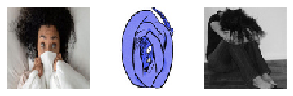

Health estimation score
[addiction,anxiety,depression,futility,insomnia,nightmare]
image 1 [12,13,30,13,12,20] => max : depression 
image 2 [ 3,60,36, 0, 0, 1] => max : anxiety 
image 3 [19,12,42,12, 2,14] => max : depression 


In [6]:
CnnExtModel.set_macro('plain_health',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['loop', {'repeat':4}, ['conv', {'ksize':3, 'chn':16, 'actions':'#act'}]],
        ['custom', {'name':'pn', 'args':{'#cnt1':3, '#n':32, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':3, '#n':64, '#act':'#act'}}],
        ['avg', {'stride':4}]])

plain_health = CnnExtModel('plain_health', hd,
        ['custom', {'name':'plain_health', 'args':{'#act':'LAB'}}],
                    dump_structure=True)
plain_health.exec_all(epoch_count=10, report=2)

custom residual_health
  serial
    1: conv, (64, 64, 3)=>[32, 32, 16] pm:7x7x3x16+16=2368
    2: max, [32, 32, 16]=>[16, 16, 16]
    custom rfull
      serial
        loop
          custom rf
            add
              serial
                3: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
                4: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
          custom rf
            add
              serial
                5: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
                6: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
    custom rhalf
      serial
        custom rh
          add
            serial
              7: conv, [16, 16, 16]=>[8, 8, 32] pm:3x3x16x32+32=4640
              8: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
            9: avg, [16, 16, 16]=>[8, 8, 16]
        loop
          custom rf
            add
              serial
                10: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
                11:

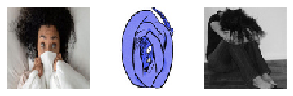

Health estimation score
[addiction,anxiety,depression,futility,insomnia,nightmare]
image 1 [24,33,10,10, 9,14] => max : anxiety 
image 2 [15,70, 5, 3, 6, 1] => max : anxiety 
image 3 [29,26,14, 9, 4,18] => max : addiction 


In [7]:
CnnExtModel.set_macro('residual_health',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['custom', {'name':'rfull', 'args':{'#cnt':2, '#n':16, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':1, '#n':32, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':1, '#n':64, '#act':'#act'}}],
        ['avg', {'stride':4}]])

residual_health = CnnExtModel('residual_health', hd,
      ['custom', {'name':'residual_health', 'args':{'#act':'LAB'}}],
                  dump_structure=True)
residual_health.exec_all(epoch_count=10, report=2)

custom bottleneck_health
  serial
    1: conv, (64, 64, 3)=>[32, 32, 16] pm:7x7x3x16+16=2368
    2: max, [32, 32, 16]=>[16, 16, 16]
    custom bfull
      serial
        loop
          custom bf
            add
              serial
                3: conv, [16, 16, 16]=>[16, 16, 16] pm:1x1x16x16+16=272
                4: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
                5: conv, [16, 16, 16]=>[16, 16, 64] pm:1x1x16x64+64=1088
    custom bhalf
      serial
        custom bh
          add
            serial
              6: conv, [16, 16, 64]=>[8, 8, 32] pm:1x1x64x32+32=2080
              7: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
              8: conv, [8, 8, 32]=>[8, 8, 128] pm:1x1x32x128+128=4224
            9: avg, [16, 16, 64]=>[8, 8, 64]
        loop
          custom bf
            add
              serial
                10: conv, [8, 8, 128]=>[8, 8, 32] pm:1x1x128x32+32=4128
                11: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
      

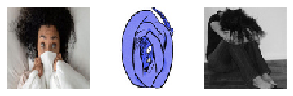

Health estimation score
[addiction,anxiety,depression,futility,insomnia,nightmare]
image 1 [ 0, 0, 0, 7, 0,93] => max : nightmare 
image 2 [18,45, 0, 4, 0,33] => max : anxiety 
image 3 [ 0, 0,76, 2, 0,22] => max : depression 


In [8]:
CnnExtModel.set_macro('bottleneck_health',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull', 'args':{'#cnt':1,'#n1':16,'#n4': 64,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':2,'#n1':32,'#n4':128,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':1,'#n1':64,'#n4':256,
            '#act':'#act'}}],
        ['avg', {'stride':4}]])

bottleneck_health = CnnExtModel('bottleneck_health', hd,
    ['custom', {'name':'bottleneck_health', 'args':{'#act':'LAB'}}],
        dump_structure=True)
bottleneck_health.exec_all(epoch_count=100, report=2)

custom bottleneck_health
  serial
    1: conv, (64, 64, 3)=>[32, 32, 16] pm:7x7x3x16+16=2368
    2: max, [32, 32, 16]=>[16, 16, 16]
    custom bfull
      serial
        loop
          custom bf
            add
              serial
                3: conv, [16, 16, 16]=>[16, 16, 16] pm:1x1x16x16+16=272
                4: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
                5: conv, [16, 16, 16]=>[16, 16, 64] pm:1x1x16x64+64=1088
    custom bhalf
      serial
        custom bh
          add
            serial
              6: conv, [16, 16, 64]=>[8, 8, 32] pm:1x1x64x32+32=2080
              7: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
              8: conv, [8, 8, 32]=>[8, 8, 128] pm:1x1x32x128+128=4224
            9: avg, [16, 16, 64]=>[8, 8, 64]
        loop
          custom bf
            add
              serial
                10: conv, [8, 8, 128]=>[8, 8, 32] pm:1x1x128x32+32=4128
                11: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
      

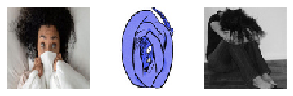

Health estimation score
[addiction,anxiety,depression,futility,insomnia,nightmare]
image 1 [ 0, 0, 0, 1, 0,99] => max : nightmare 
image 2 [ 4,68, 2,16, 0,10] => max : anxiety 
image 3 [ 0, 2,92, 1, 5, 1] => max : depression 


In [9]:
CnnExtModel.set_macro('bottleneck_health',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull', 'args':{'#cnt':1,'#n1':16,'#n4': 64,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':2,'#n1':32,'#n4':128,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':1,'#n1':64,'#n4':256,
            '#act':'#act'}}],
        ['avg', {'stride':4}]])

bottleneck_health = CnnExtModel('bottleneck_health', hd,
    ['custom', {'name':'bottleneck_health', 'args':{'#act':'LAB'}}],
        dump_structure=True)
bottleneck_health.exec_all(epoch_count=500, report=100)

Model bottleneck_health Visualization


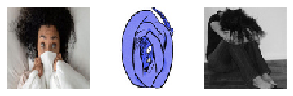

Health estimation score
[addiction,anxiety,depression,futility,insomnia,nightmare]
image 1 [ 0, 0, 0, 1, 0,99] => max : nightmare 
image 2 [ 4,68, 2,16, 0,10] => max : anxiety 
image 3 [ 0, 2,92, 1, 5, 1] => max : depression 


In [10]:
hd.init_visualize_data([64,64], [64,64,3])
bottleneck_health.visualize(3)